## Question 3: What is the relationship between yr_built vs grade? 
### At What Age is Considered "Desirablely Old"?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
data = pd.read_csv('kc_house_data_cleaned.csv')
df = pd.DataFrame(data)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074


In [50]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_renovated,zipcode
price,1.000000,0.594361,0.787544,0.893595,0.282848,0.457296,0.338668,0.135547,0.823567,0.704766,0.354098,0.042015
bedrooms,0.594361,1.000000,0.741538,0.744833,0.081447,0.523557,0.072662,0.142107,0.706068,0.519526,0.205000,-0.065723
bathrooms,0.787544,0.741538,1.000000,0.916858,0.208304,0.645239,0.164218,0.001075,0.878041,0.612169,0.282226,-0.108692
sqft_living,0.893595,0.744833,0.916858,1.000000,0.273276,0.578379,0.240537,0.049683,0.955706,0.666485,0.293519,-0.072849
sqft_lot,0.282848,0.081447,0.208304,0.273276,1.000000,0.068895,0.063285,-0.053200,0.297989,0.110740,0.034445,-0.138407
floors,0.457296,0.523557,0.645239,0.578379,0.068895,1.000000,0.040011,-0.121418,0.663200,0.149332,0.157196,0.006510
waterfront,0.338668,0.072662,0.164218,0.240537,0.063285,0.040011,1.000000,-0.020097,0.207054,0.254184,0.153212,0.048462
condition,0.135547,0.142107,0.001075,0.049683,-0.053200,-0.121418,-0.020097,1.000000,-0.029711,0.245982,0.031744,0.087002
sqft_above,0.823567,0.706068,0.878041,0.955706,0.297989,0.663200,0.207054,-0.029711,1.000000,0.452258,0.224978,-0.112230
sqft_basement,0.704766,0.519526,0.612169,0.666485,0.110740,0.149332,0.254184,0.245982,0.452258,1.000000,0.354790,0.086733


In [28]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')

In [33]:
q3_var = [ 'price', 'condition', 'grade', 'yr_built', 'yr_renovated']
q3_df = df[q3_var]
q3_df.corr()

,price,condition,grade,yr_built,yr_renovated
price,1.000000,0.036031,0.667964,0.053965,0.117858
condition,0.036031,1.000000,-0.146854,-0.361555,-0.055795
grade,0.667964,-0.146854,1.000000,0.447854,0.015618
yr_built,0.053965,-0.361555,0.447854,1.000000,-0.202565
yr_renovated,0.117858,-0.055795,0.015618,-0.202565,1.000000


In [22]:
#Grade vs Yr_Built- 

grade_build = df.groupby('yr_built')['grade'].mean()
grade_build.head()

yr_built
1900    6.873563
1901    7.034483
1902    7.444444
1903    6.869565
1904    6.911111
Name: grade, dtype: float64

In [37]:
grade_build = df.groupby('yr_built')['grade'].median()
grade_build.head()

yr_built
1900    7.0
1901    7.0
1902    7.0
1903    7.0
1904    7.0
Name: grade, dtype: float64

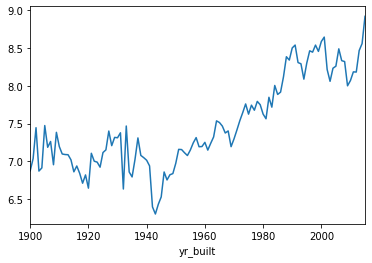

In [23]:
grade_build.plot()

In [10]:
df = df.groupby(['grade', 'yr_built']).mean()
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
grade yr_built                                                                 
3     1920      262000.0       1.0       0.75        520.0   12981.0     1.0   
4     1900      130000.0       2.0       1.00        600.0    1500.0     1.0   
      1912       90000.0       1.5       0.75        545.0    5145.0     1.0   
      1914      248000.0       2.0       1.00        770.0    8600.0     1.0   
      1918       95000.0       2.0       1.00        960.0    7000.0     1.0   

                waterfront  condition  sqft_above  sqft_basement  \
grade yr_built                                                     
3     1920             0.0        5.0       520.0            0.0   
4     1900             0.0        4.0       600.0            0.0   
      1912             0.0        3.0       545.0            0.0   
      1914             0.0        4.0       770.0            0.0   
      1918             0.0        3.0       960.0            0.0   

                yr_renovated  zipcode  
grade yr_built                         
3     1920               0.0  98022.0  
4     1900               0.0  98027.0  
      1912               0.0  98023.0  
      1914               0.0  98027.0  
      1918               0.0  98198.0

In [38]:
df = df.groupby(['grade', 'yr_built']).median()
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
grade yr_built                                                                 
3     1920      262000.0       1.0       0.75        520.0   12981.0     1.0   
4     1900      130000.0       2.0       1.00        600.0    1500.0     1.0   
      1912       90000.0       1.5       0.75        545.0    5145.0     1.0   
      1914      248000.0       2.0       1.00        770.0    8600.0     1.0   
      1918       95000.0       2.0       1.00        960.0    7000.0     1.0   

                waterfront  condition  sqft_above  sqft_basement  \
grade yr_built                                                     
3     1920             0.0        5.0       520.0            0.0   
4     1900             0.0        4.0       600.0            0.0   
      1912             0.0        3.0       545.0            0.0   
      1914             0.0        4.0       770.0            0.0   
      1918             0.0        3.0       960.0            0.0   

                yr_renovated  zipcode  
grade yr_built                         
3     1920               0.0  98022.0  
4     1900               0.0  98027.0  
      1912               0.0  98023.0  
      1914               0.0  98027.0  
      1918               0.0  98198.0

In [45]:
yr_grade = df.groupby(['grade', 'yr_built'])['price'].mean()
yr_grade.head(20)

grade  yr_built
3      1920        262000.0
4      1900        130000.0
       1912         90000.0
       1914        248000.0
       1918         95000.0
       1920        152000.0
       1924        330000.0
       1926        140000.0
       1931        352000.0
       1932        230000.0
       1934        217000.0
       1936        435000.0
       1937        247000.0
       1942        205000.0
       1945        188000.0
       1946        355000.0
       1947        123000.0
       1948        145000.0
       1949        190025.0
       1950        252500.0
Name: price, dtype: float64

Text(0, 0.5, 'Average Home Price')

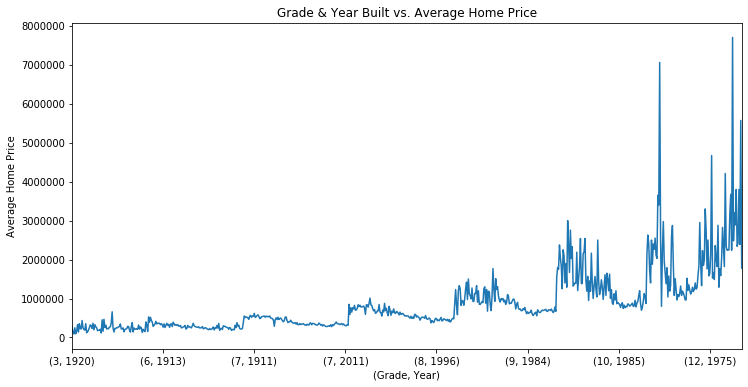

In [48]:
yr_grade.plot(figsize = (12,6))
plt.title('Grade & Year Built vs. Average Home Price')
plt.xlabel('(Grade, Year)')
plt.ylabel('Average Home Price')
#As grade increases, the price of the home increases. Grade and Price had a (positive) correlation coefficiant of 0.667964
#Yr_built and grade had a (positive) correlation of 0.447854. This is low. Homes built in the years 1920-1911 had the lowest grades, and lowest average price sold.
#homes built in the year 1984-1975 had the highest grades and average home prices.
#homes in the 70s are considered vintage

Text(0, 0.5, 'Average Home Price')

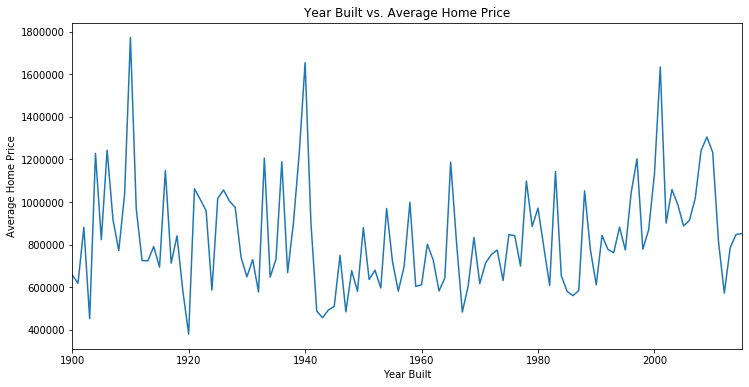

In [49]:
built = df.groupby('yr_built')['price'].mean()
built.plot(figsize = (12,6))
plt.title('Year Built vs. Average Home Price')
plt.xlabel('Year Built')
plt.ylabel('Average Home Price')

#~1910 & ~1940's and 2000's are among the highest sold homes.
#Suprisingly yr_build and yr_renovation had correlations of 0.053965 & 0.117858 with the house price
#homes in the 1910's were inspired by the Victotian style architecture. These houses can make a profit 
#by being sold to historical societies or used in movie sets. Renovation is likely neglible because buyers 
#who purchase lived in home probably plan to do renovations of their own, making the current renovations irrelevant

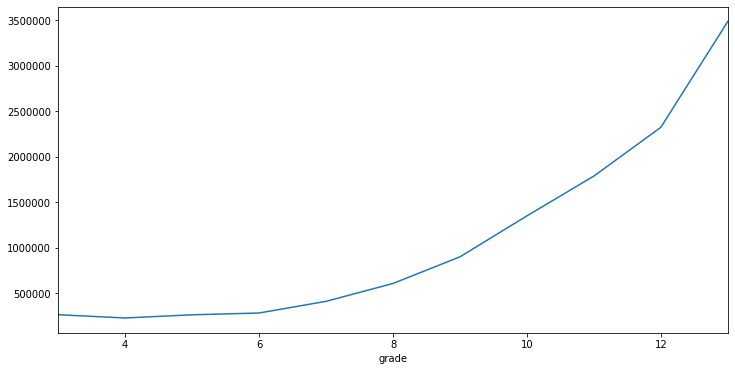

In [47]:
price_gr = df.groupby('grade')['price'].mean()
price_gr.plot(figsize = (12,6))

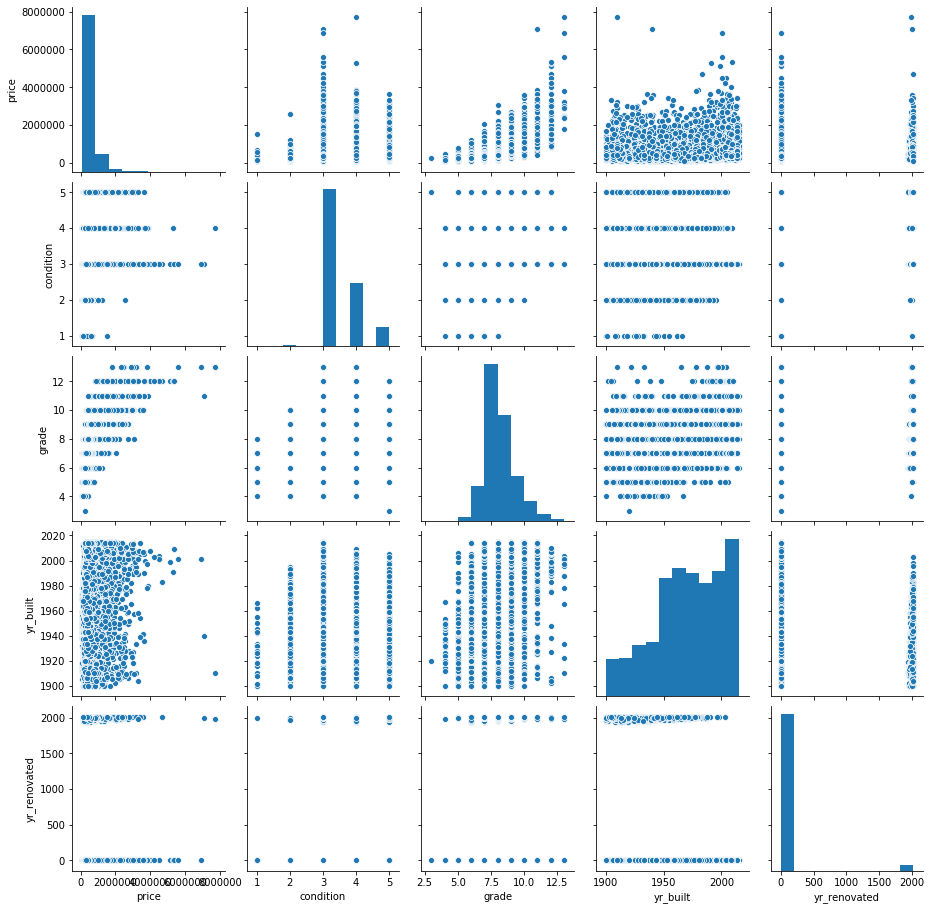

In [36]:
sns.pairplot(q3_df)